## 11. 딥러닝 모델 실습

### 11-2. Fashion MNIST Model

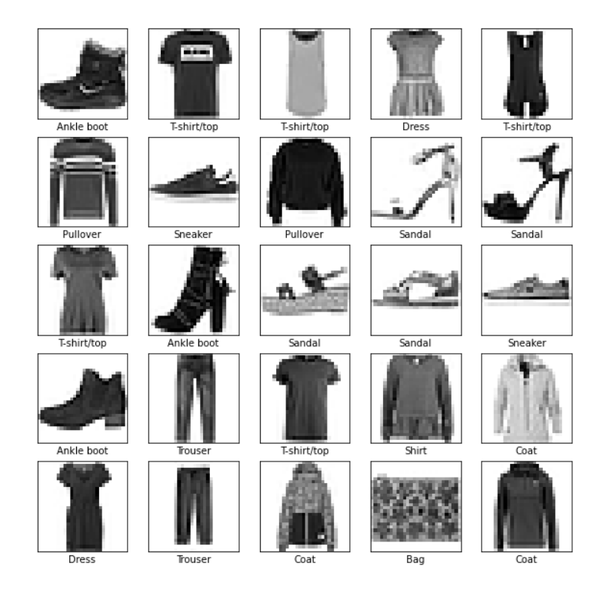

In [8]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [11]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

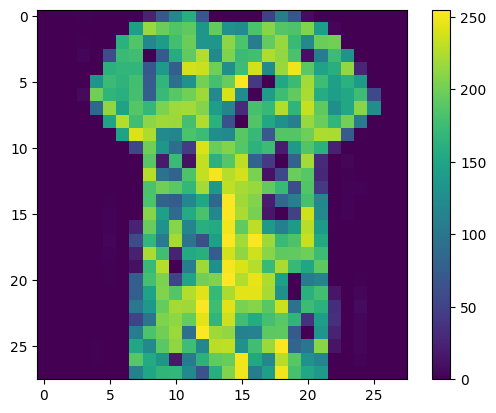

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

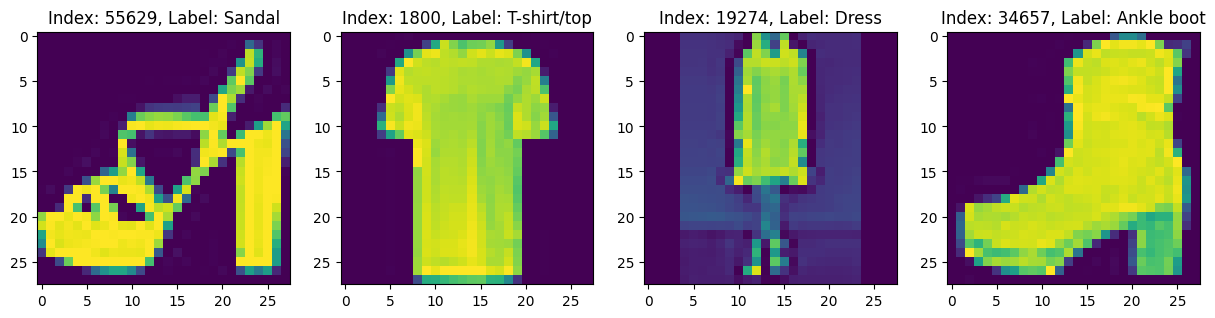

In [13]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

### 데이터 전처리

In [14]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


In [15]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [16]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [17]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [18]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

### 모델 구축 및 학습

In [19]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60


83/83 [==============================] - 1s 6ms/step - loss: 2.1909 - accuracy: 0.3504 - val_loss: 2.0450 - val_accuracy: 0.4071
Epoch 2/60
83/83 [==============================] - 0s 4ms/step - loss: 1.9213 - accuracy: 0.5907 - val_loss: 1.8083 - val_accuracy: 0.5728
Epoch 3/60
83/83 [==============================] - 0s 4ms/step - loss: 1.7147 - accuracy: 0.6447 - val_loss: 1.6259 - val_accuracy: 0.6663
Epoch 4/60
83/83 [==============================] - 0s 4ms/step - loss: 1.5521 - accuracy: 0.6755 - val_loss: 1.4843 - val_accuracy: 0.6579
Epoch 5/60
83/83 [==============================] - 0s 4ms/step - loss: 1.4231 - accuracy: 0.6882 - val_loss: 1.3698 - val_accuracy: 0.6616
Epoch 6/60
83/83 [==============================] - 0s 4ms/step - loss: 1.3206 - accuracy: 0.6977 - val_loss: 1.2762 - val_accuracy: 0.6973
Epoch 7/60
83/83 [==============================] - 0s 4ms/step - loss: 1.2373 - accuracy: 0.7080 - val_loss: 1.2054 - val_accuracy: 0.6804
Epoch 8/60
83/83 [

In [22]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

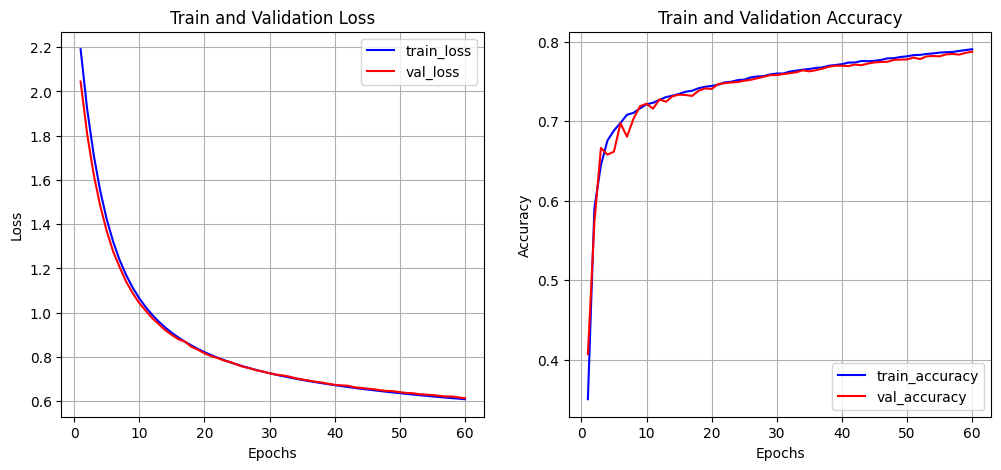

In [23]:
show_history(history)

### 모델 평가 및 예측

In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 680us/step - loss: 0.6274 - accuracy: 0.7798


[0.6273505687713623, 0.7797999978065491]

In [25]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 [==============================] - 0s 636us/step
[1.2610423e-02 9.4270080e-01 4.2565190e-03 1.5561039e-02 1.7656054e-02
 3.7429982e-05 7.0426916e-03 3.1576878e-05 9.0773181e-05 1.2694784e-05]
1
Trouser


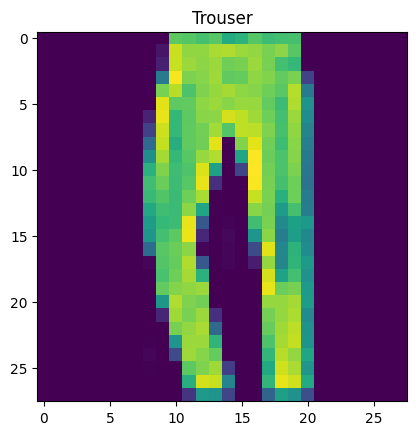

In [26]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [27]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [28]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

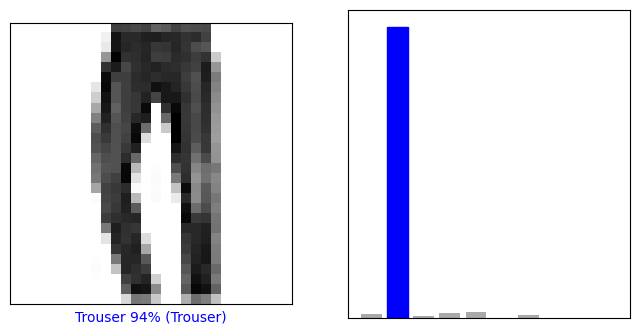

In [29]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

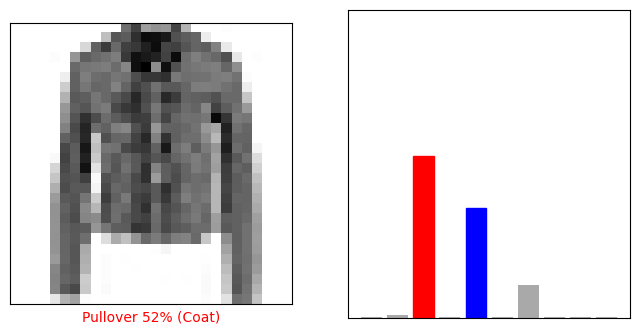

In [30]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

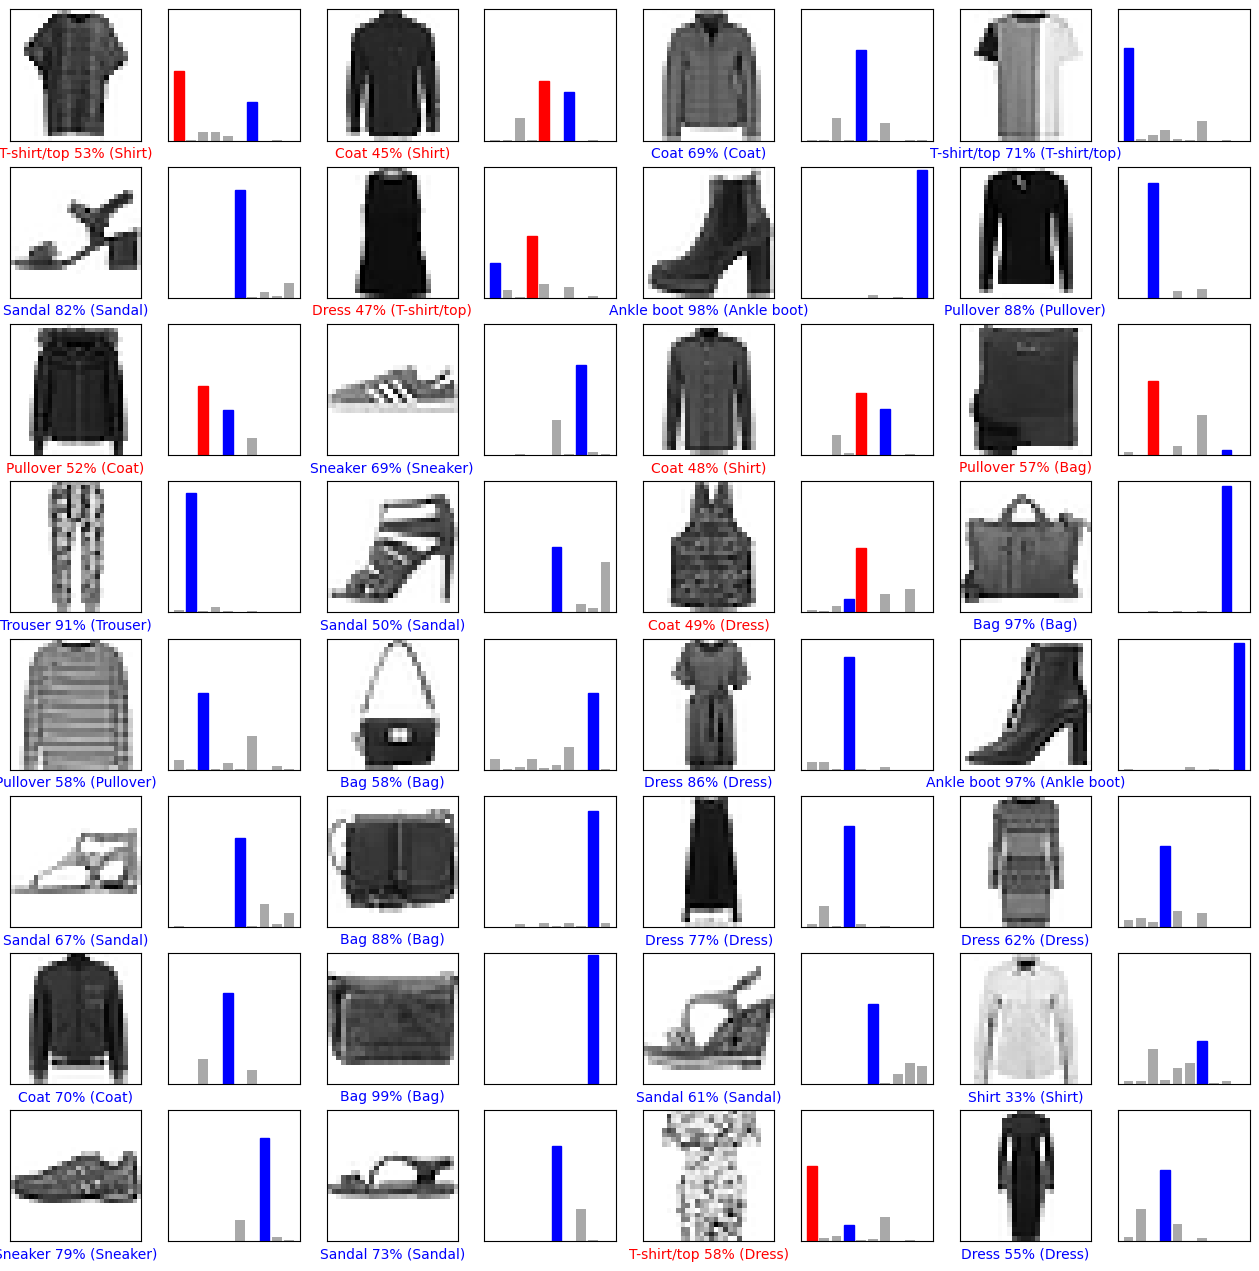

In [31]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [32]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.78      0.76      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.67      0.63      0.65      1000
       Dress       0.76      0.83      0.80      1000
        Coat       0.65      0.71      0.68      1000
      Sandal       0.84      0.84      0.84      1000
       Shirt       0.50      0.41      0.45      1000
     Sneaker       0.84      0.85      0.84      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.88      0.92      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



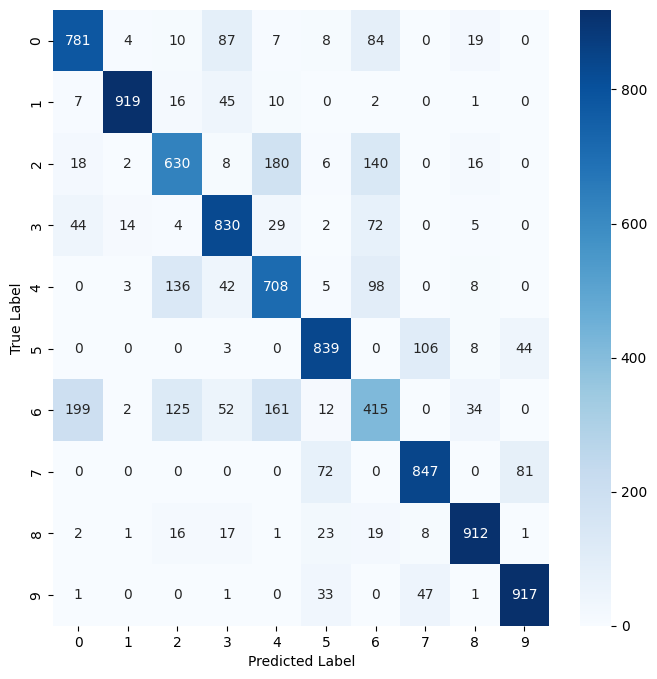

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 11-3. Model Optimization

#### Early Stopping

In [34]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5950 - accuracy: 0.7936 - val_loss: 0.5872 - val_accuracy: 0.7977
Epoch 2/60
 154/1313 [==>...........................] - ETA: 1s - loss: 0.5899 - accuracy: 0.7950

c:\Users\daeho\anaconda3\envs\yolo\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1313/1313 [==============================] - 2s 1ms/step - loss: 0.5678 - accuracy: 0.8035 - val_loss: 0.5625 - val_accuracy: 0.8062
Epoch 3/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5468 - accuracy: 0.8102 - val_loss: 0.5461 - val_accuracy: 0.8113
Epoch 4/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5306 - accuracy: 0.8150 - val_loss: 0.5368 - val_accuracy: 0.8143
Epoch 5/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5171 - accuracy: 0.8184 - val_loss: 0.5234 - val_accuracy: 0.8164
Epoch 6/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5062 - accuracy: 0.8224 - val_loss: 0.5107 - val_accuracy: 0.8249
Epoch 7/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4965 - accuracy: 0.8268 - val_loss: 0.5051 - val_accuracy: 0.8216
Epoch 8/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4882 - accuracy: 0.8288 - val_loss: 0.5028 - val_accuracy: 0.8244
Epo

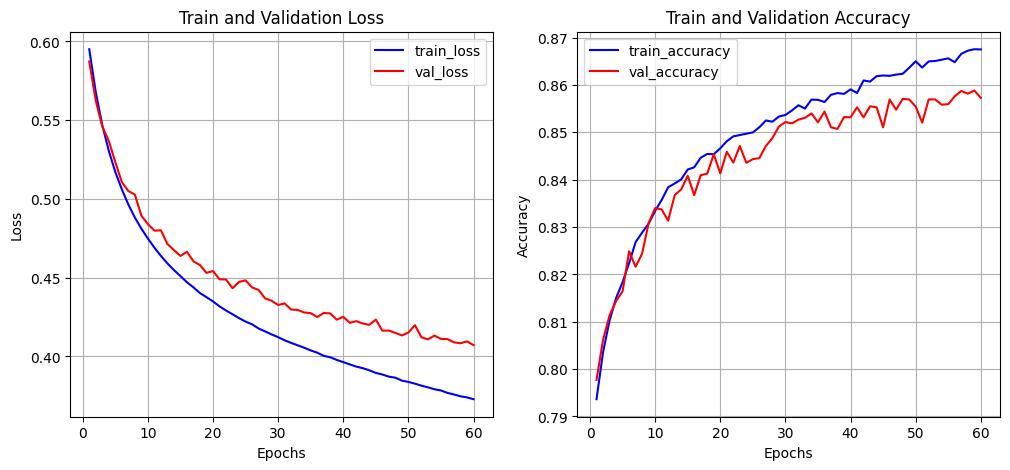

In [35]:
show_history(history)

In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 683us/step - loss: 0.4270 - accuracy: 0.8461


[0.4269886612892151, 0.8460999727249146]

### 활성화 함수 (sigmoid -> ReLU)

In [37]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7769 - accuracy: 0.7514 - val_loss: 0.5854 - val_accuracy: 0.8063
Epoch 2/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5302 - accuracy: 0.8219 - val_loss: 0.5168 - val_accuracy: 0.8291
Epoch 3/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4805 - accuracy: 0.8353 - val_loss: 0.5019 - val_accuracy: 0.8289
Epoch 4/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4524 - accuracy: 0.8440 - val_loss: 0.4538 - val_accuracy: 0.8464
Epoch 5/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4327 - accuracy: 0.8508 - val_loss: 0.4436 - val_accuracy: 0.8505
Epoch 6/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4187 - accuracy: 0.8552 - val_loss: 0.4311 - val_accuracy: 0.8529
Epoch 7/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4055 - accuracy: 0.8597 - val_loss: 0.4314 - val_accuracy:

In [39]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

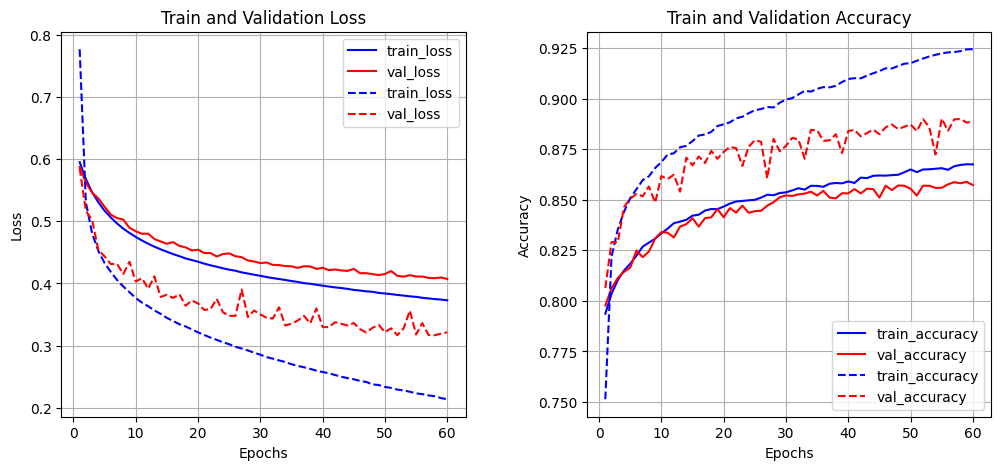

In [40]:
diff_history(history, history2)

In [41]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 717us/step - loss: 0.3448 - accuracy: 0.8765


[0.34483602643013, 0.8765000104904175]

### Optimizer (SGD -> Adam)

In [43]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.5012 - accuracy: 0.8197 - val_loss: 0.4303 - val_accuracy: 0.8429
Epoch 2/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3773 - accuracy: 0.8620 - val_loss: 0.3680 - val_accuracy: 0.8683
Epoch 3/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3362 - accuracy: 0.8766 - val_loss: 0.3553 - val_accuracy: 0.8714
Epoch 4/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3102 - accuracy: 0.8859 - val_loss: 0.3509 - val_accuracy: 0.8751
Epoch 5/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2915 - accuracy: 0.8907 - val_loss: 0.3442 - val_accuracy: 0.8791
Epoch 6/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.8980 - val_loss: 0.3405 - val_accuracy: 0.8829
Epoch 7/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2601 - accuracy: 0.9034 - val_loss: 0.3190 - val_accuracy:

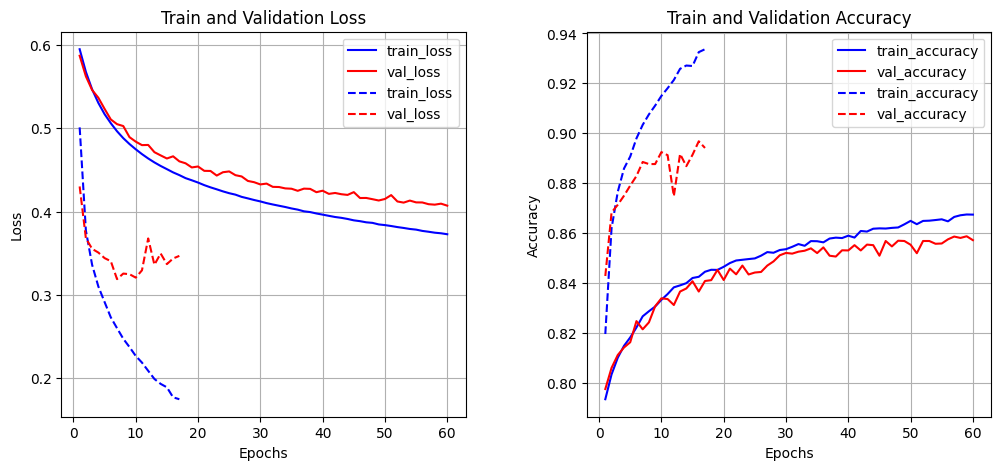

In [45]:
diff_history(history, history3)

In [46]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 683us/step - loss: 0.3376 - accuracy: 0.8817


[0.33761775493621826, 0.8816999793052673]

### Regularization

In [47]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, kernel_regularizer='l2', activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
history4 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 2s 2ms/step - loss: 1.1050 - accuracy: 0.7764 - val_loss: 0.7637 - val_accuracy: 0.7946
Epoch 2/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7263 - accuracy: 0.7945 - val_loss: 0.6863 - val_accuracy: 0.7998
Epoch 3/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.6881 - accuracy: 0.8025 - val_loss: 0.6532 - val_accuracy: 0.8132
Epoch 4/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.6450 - accuracy: 0.8164 - val_loss: 0.6874 - val_accuracy: 0.7913
Epoch 5/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.6321 - accuracy: 0.8185 - val_loss: 0.6248 - val_accuracy: 0.8223
Epoch 6/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.6113 - accuracy: 0.8233 - val_loss: 0.6131 - val_accuracy: 0.8220
Epoch 7/60
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5957 - accuracy: 0.8283 - val_loss: 0.5661 - val_accuracy:

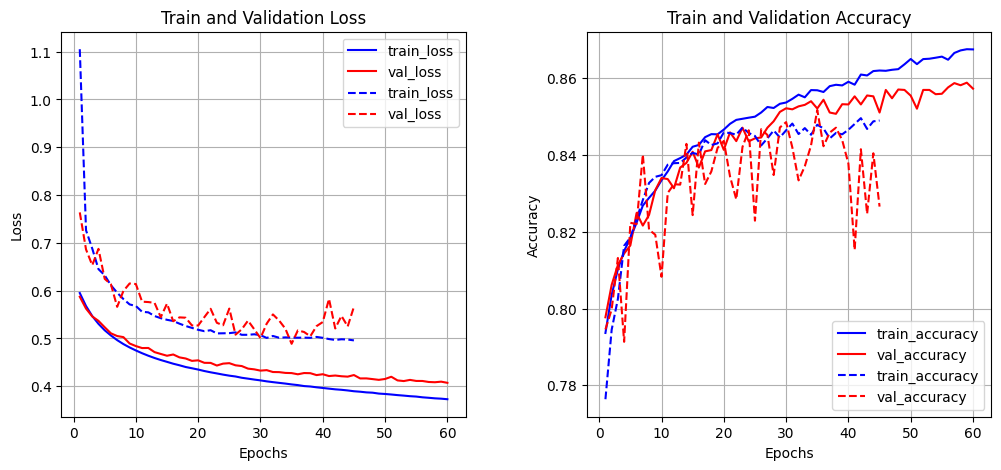

In [49]:
diff_history(history, history4)

In [50]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 703us/step - loss: 0.5096 - accuracy: 0.8462


[0.5095510482788086, 0.8461999893188477]

### Dropout

In [51]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, kernel_regularizer='l2', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
history5 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 2s 2ms/step - loss: 1.2714 - accuracy: 0.7429 - val_loss: 0.7967 - val_accuracy: 0.7987
Epoch 2/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8605 - accuracy: 0.7572 - val_loss: 0.7608 - val_accuracy: 0.7881
Epoch 3/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8437 - accuracy: 0.7606 - val_loss: 0.7335 - val_accuracy: 0.8027
Epoch 4/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8243 - accuracy: 0.7649 - val_loss: 0.7399 - val_accuracy: 0.7999
Epoch 5/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8095 - accuracy: 0.7685 - val_loss: 0.7024 - val_accuracy: 0.8148
Epoch 6/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.7969 - accuracy: 0.7720 - val_loss: 0.7585 - val_accuracy: 0.7987
Epoch 7/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.7912 - accuracy: 0.7684 - val_loss: 0.6656 - val_accuracy:

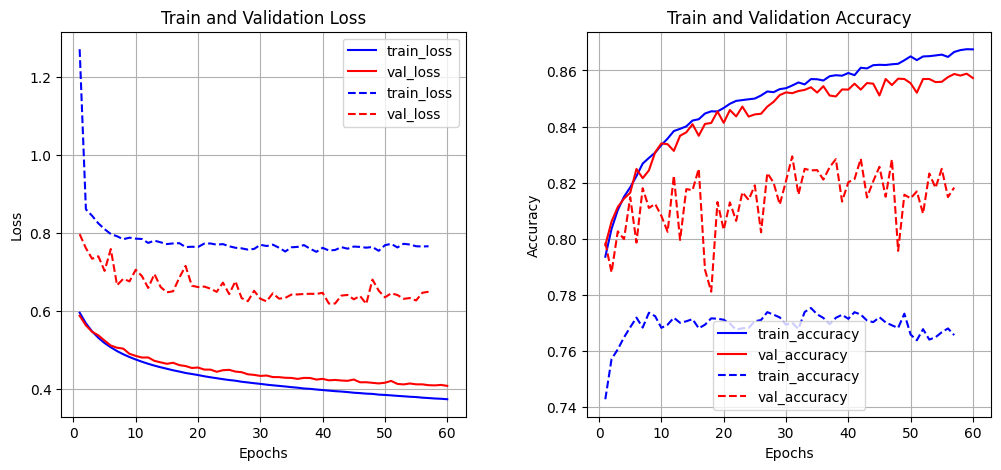

In [53]:
diff_history(history, history5)

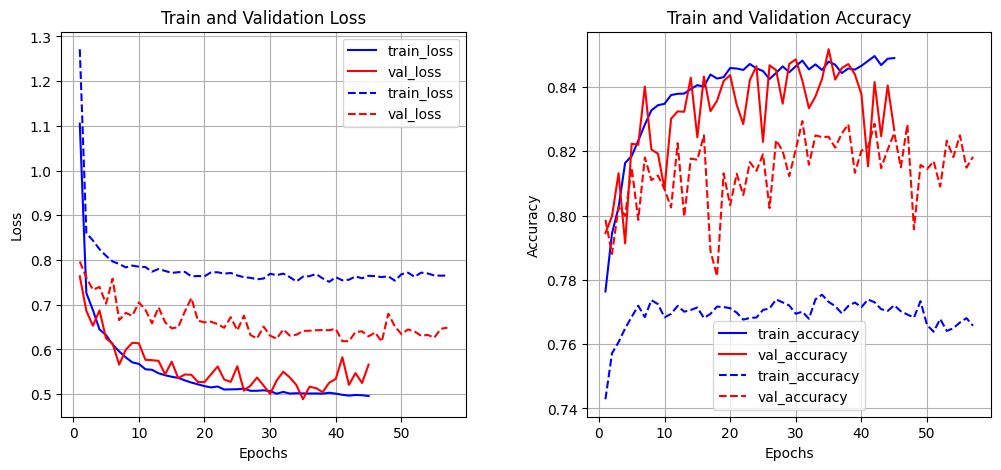

In [54]:
diff_history(history4, history5) # L2 규제와  Dropout의 비교

In [55]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 693us/step - loss: 0.6341 - accuracy: 0.8178


[0.6340826749801636, 0.817799985408783]

### BatchNormalization

In [56]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, kernel_regularizer='l2', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 409098 (1.56 MB)
Trainable params: 408074 (1.56 MB)
Non-trainable params: 1024 (4.00 KB)
_________________________________________________________________


In [57]:
history6 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 3s 2ms/step - loss: 1.2465 - accuracy: 0.8073 - val_loss: 1.2342 - val_accuracy: 0.6651
Epoch 2/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.7345 - accuracy: 0.8150 - val_loss: 0.9903 - val_accuracy: 0.7450
Epoch 3/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.7186 - accuracy: 0.8164 - val_loss: 1.0900 - val_accuracy: 0.7288
Epoch 4/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.7005 - accuracy: 0.8182 - val_loss: 0.9948 - val_accuracy: 0.7179
Epoch 5/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.6824 - accuracy: 0.8230 - val_loss: 0.8132 - val_accuracy: 0.7886
Epoch 6/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.6529 - accuracy: 0.8250 - val_loss: 1.0355 - val_accuracy: 0.7219
Epoch 7/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.6312 - accuracy: 0.8299 - val_loss: 0.9015 - val_accuracy:

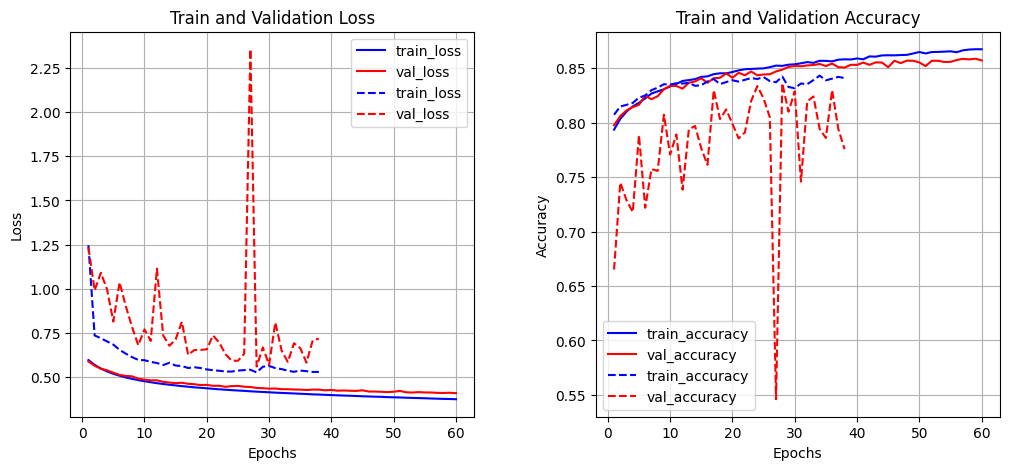

In [58]:
diff_history(history, history6)

In [59]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 727us/step - loss: 0.5899 - accuracy: 0.8217


[0.589923083782196, 0.8216999769210815]

### BatchNormalization + Dropout

In [60]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, kernel_regularizer='l2', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 409098 (1.56 MB)
Trainable params: 408074 (1.56 MB)
Non-trainable params: 1024 (4.00 KB)
_________________

In [61]:
history7 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 3s 2ms/step - loss: 1.5646 - accuracy: 0.7705 - val_loss: 1.2709 - val_accuracy: 0.6292
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.9080 - accuracy: 0.7696 - val_loss: 0.8885 - val_accuracy: 0.7869
Epoch 3/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.9054 - accuracy: 0.7684 - val_loss: 0.8827 - val_accuracy: 0.7642
Epoch 4/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8981 - accuracy: 0.7657 - val_loss: 0.9321 - val_accuracy: 0.7483
Epoch 5/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8785 - accuracy: 0.7693 - val_loss: 1.2640 - val_accuracy: 0.6703
Epoch 6/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8763 - accuracy: 0.7680 - val_loss: 0.9118 - val_accuracy: 0.7526
Epoch 7/60
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8722 - accuracy: 0.7685 - val_loss: 0.7754 - val_accuracy:

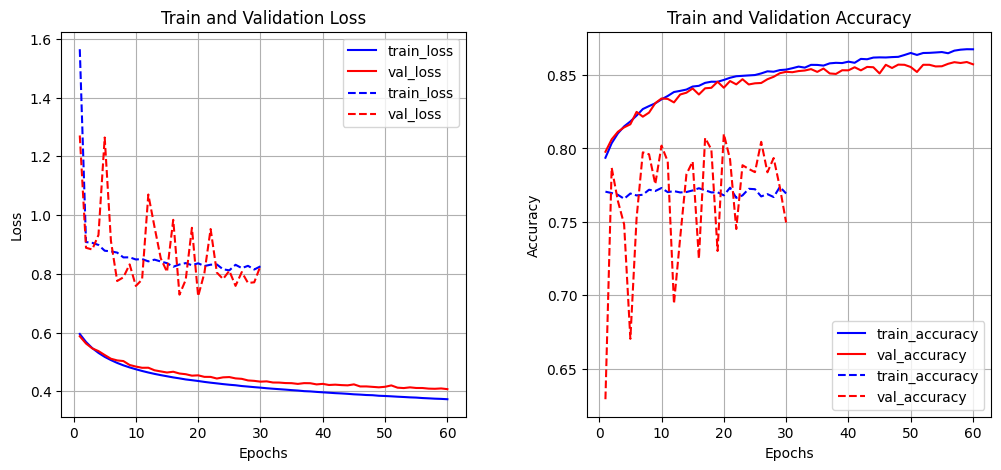

In [62]:
diff_history(history, history7)

In [63]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 729us/step - loss: 0.7366 - accuracy: 0.8032


[0.7365699410438538, 0.8032000064849854]

### 결과 시각화

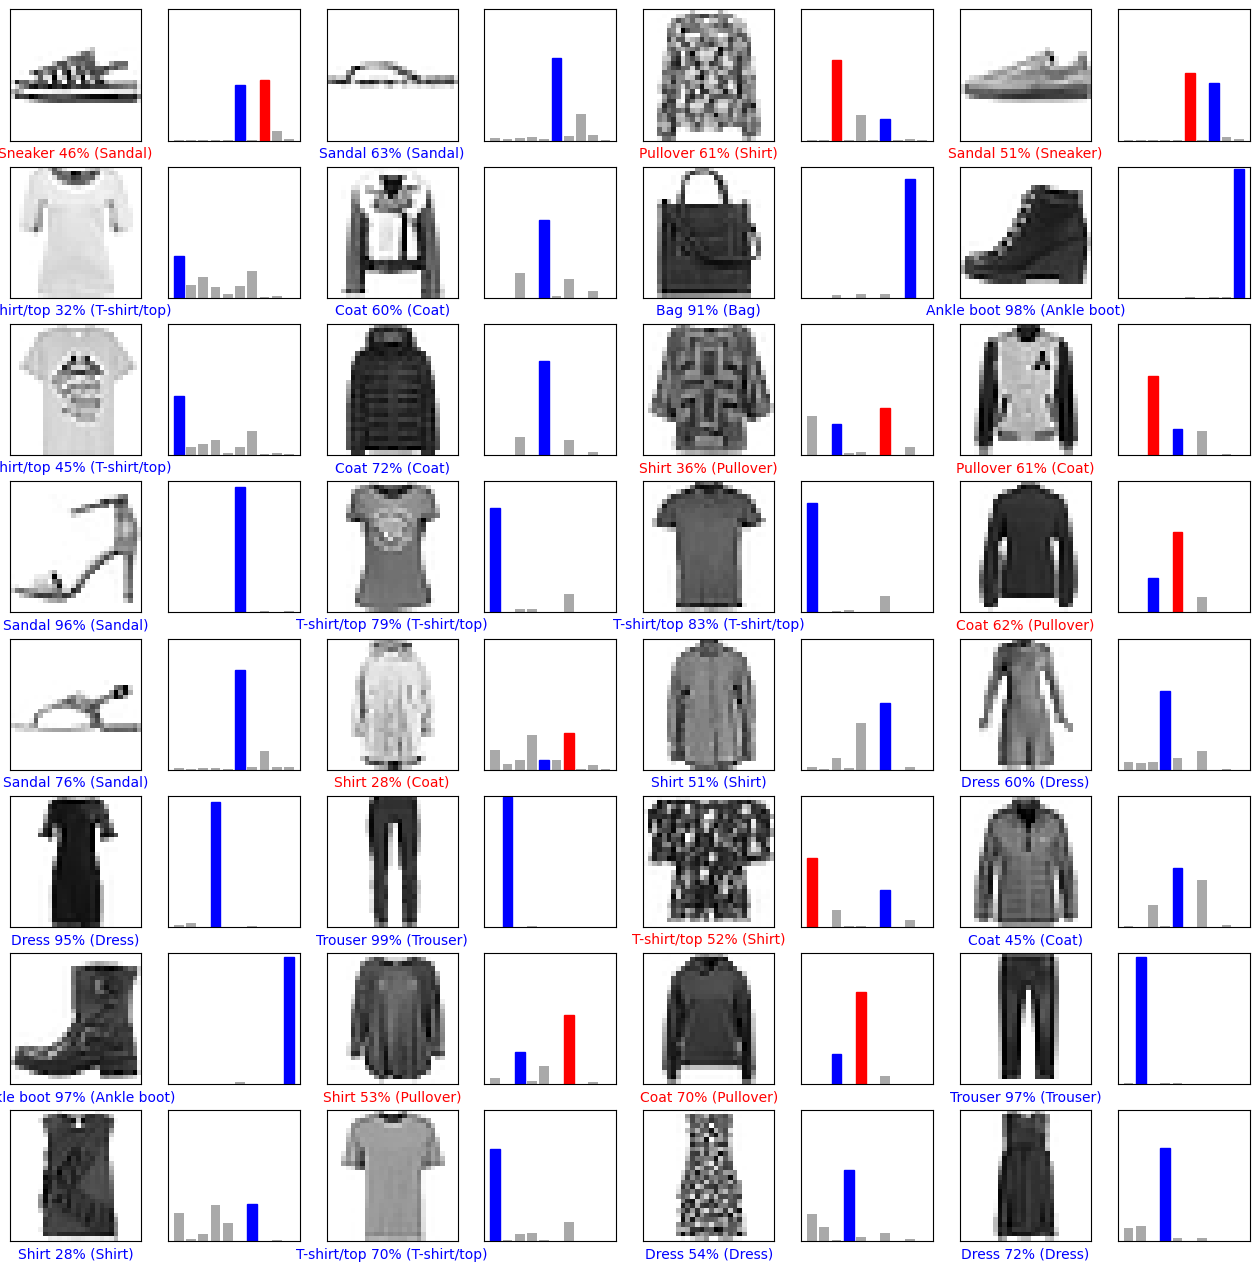

In [64]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [65]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.78      0.76      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.67      0.63      0.65      1000
       Dress       0.76      0.83      0.80      1000
        Coat       0.65      0.71      0.68      1000
      Sandal       0.84      0.84      0.84      1000
       Shirt       0.50      0.41      0.45      1000
     Sneaker       0.84      0.85      0.84      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.88      0.92      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



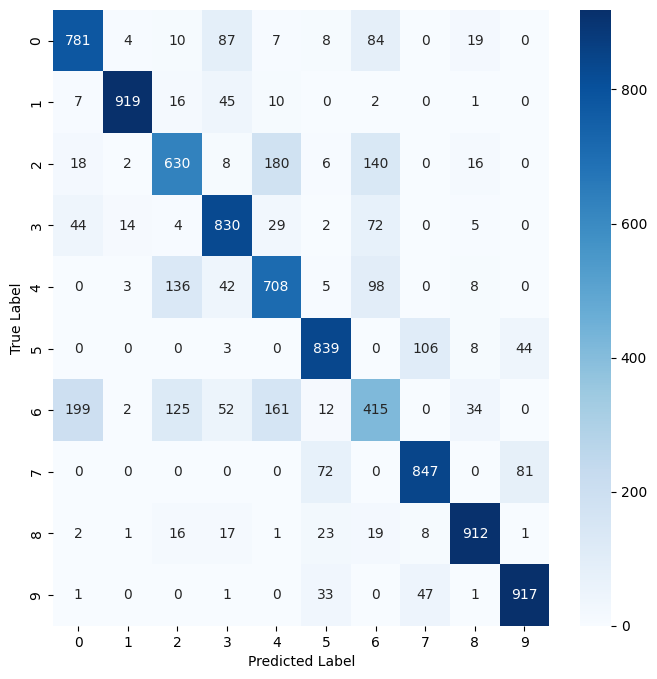

In [66]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()